In [15]:
from collections.abc import Sequence
from sklearn import preprocessing
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import shutil
import os


# Encode text values to dummy variables(i.e. [1,0,0],[0,1,0],[0,0,1] for red,green,blue)
def encode_text_dummy(df, name):
    dummies = pd.get_dummies(df[name])
    for x in dummies.columns:
        dummy_name = "{}-{}".format(name, x)
        df[dummy_name] = dummies[x]
    df.drop(name, axis=1, inplace=True)


# Encode a numeric column as zscores
def encode_numeric_zscore(df, name, mean=None, sd=None):
    if mean is None:
        mean = df[name].mean()

    if sd is None:
        sd = df[name].std()

    df[name] = (df[name] - mean) / sd


In [16]:
import io
import requests
path = "./data/"

filename_read = os.path.join(path,"heart_disease.csv")
df = pd.read_csv(filename_read,na_values=['NA','?'])
df

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45,1,1,110,264,0,0,132,0,1.2,2,1
1186,68,1,4,144,193,1,0,141,0,3.4,2,1
1187,57,1,4,130,131,0,0,115,1,1.2,2,1
1188,57,0,2,130,236,0,2,174,0,0.0,2,1


In [17]:
# return rows with one or more nulls
df[df.isnull().any(axis=1)]
df.dropna(inplace = True)


In [18]:
# Check and Drop Duplicate rows
df.drop_duplicates(inplace = True)
df

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45,1,1,110,264,0,0,132,0,1.2,2,1
1186,68,1,4,144,193,1,0,141,0,3.4,2,1
1187,57,1,4,130,131,0,0,115,1,1.2,2,1
1188,57,0,2,130,236,0,2,174,0,0.0,2,1


In [19]:
#Encoding categorical values using one-hot encoding
encode_text_dummy(df, 'sex')
encode_text_dummy(df, 'chest pain type')
encode_text_dummy(df, 'fasting blood sugar')
encode_text_dummy(df, 'resting ecg')
encode_text_dummy(df, 'exercise angina')
encode_text_dummy(df, 'ST slope')

#Normalizing the columns
encode_numeric_zscore(df,'age')
encode_numeric_zscore(df,'resting bp s')
encode_numeric_zscore(df,'cholesterol')
encode_numeric_zscore(df,'max heart rate')
encode_numeric_zscore(df,'oldpeak')


df


,age,resting bp s,cholesterol,max heart rate,oldpeak,target,sex-0,sex-1,chest pain type-1,chest pain type-2,...,fasting blood sugar-1,resting ecg-0,resting ecg-1,resting ecg-2,exercise angina-0,exercise angina-1,ST slope-0,ST slope-1,ST slope-2,ST slope-3
0,-1.432359,0.410685,0.824621,1.382175,-0.831979,0,False,True,False,True,...,False,True,False,False,True,False,False,True,False,False
1,-0.478223,1.490940,-0.171867,0.753746,0.105606,1,True,False,False,False,...,False,True,False,False,True,False,False,False,True,False
2,-1.750404,-0.129442,0.769768,-1.524307,-0.831979,0,False,True,False,True,...,False,False,True,False,True,False,False,True,False,False
3,-0.584238,0.302660,0.138964,-1.131539,0.574398,1,True,False,False,False,...,False,True,False,False,False,True,False,False,True,False
4,0.051853,0.950812,-0.034736,-0.581664,-0.831979,0,False,True,False,False,...,False,True,False,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1185,-0.902283,-1.209697,0.596068,-0.188897,0.293123,1,False,True,True,False,...,False,True,False,False,True,False,False,False,True,False
1186,1.536064,0.626736,-0.053020,0.164595,2.355810,1,False,True,False,False,...,True,True,False,False,True,False,False,False,True,False
1187,0.369898,-0.129442,-0.619830,-0.856602,0.293123,1,False,True,False,False,...,False,True,False,False,False,True,False,False,True,False
1188,0.369898,-0.129442,0.340090,1.460728,-0.831979,1,True,False,False,True,...,False,False,False,True,True,False,False,False,True,False


In [20]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
y = df['target']
X = df.drop(['target'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print("X_train Shape", X_train.shape)
print("y_train Shape", y_train.shape)
print("X_test Shape", X_test.shape)
print("y_test Shape", y_test.shape)

# Principal Component Analysis
pca = PCA(n_components = 21)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

print("X_train Shape after PCA", X_train.shape)
print("x_test Shape after PCA", X_test.shape)


X_train Shape (688, 22)
y_train Shape (688,)
X_test Shape (230, 22)
y_test Shape (230,)
X_train Shape after PCA (688, 21)
x_test Shape after PCA (230, 21)


In [21]:


# KNN 
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5, weights= 'distance', metric = 'manhattan')
p_grid = {'n_neighbors': [3, 5, 7, 9, 11, 13]}
g_search = GridSearchCV(model, p_grid, cv=5)
g_search.fit(X_train, y_train)
model = g_search.best_estimator_
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(y_pred)


[0 1 1 1 0 0 1 0 0 1 1 0 1 0 1 1 0 1 1 0 1 1 0 0 1 1 0 1 0 0 1 0 1 1 1 0 1
 0 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 1 0 0 1 1 1 0 0 0 1 0 1 1 1 1 1 0 0 1 1
 0 1 0 1 0 1 0 1 1 0 1 1 0 1 0 0 0 1 1 0 1 0 1 0 1 1 0 1 1 0 0 1 0 1 1 0 1
 1 0 0 1 0 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0 1 1 0 1 0 1 1 0 1 0 0 1 1 1 1 1 0
 0 0 0 1 1 0 1 0 0 0 0 1 0 0 1 0 1 1 1 1 0 0 1 1 0 1 0 1 1 1 0 1 1 1 0 1 0
 0 1 0 1 1 1 1 1 0 1 0 0 0 1 1 1 0 1 1 0 1 0 1 1 0 0 0 0 1 1 1 1 0 0 0 0 1
 1 0 1 0 1 1 0 0]


accuracy is  0.8869565217391304
F1 Score: 0.9
Recall: 0.8863636363636364
Precision: 0.9140625
ROC AUC Score: 0.8870593692022263


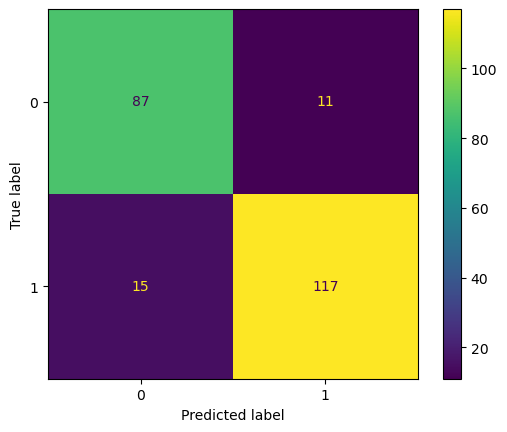

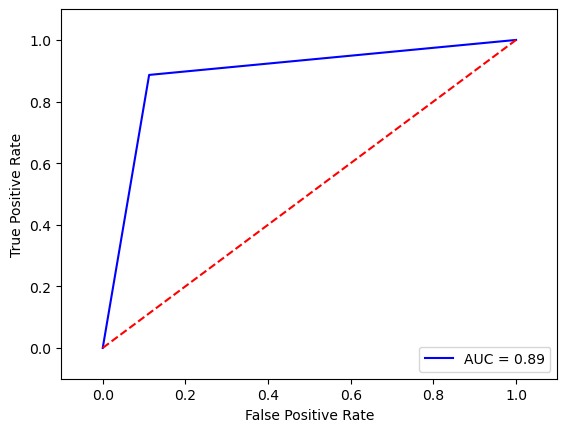

              precision    recall  f1-score   support

           0       0.85      0.89      0.87        98
           1       0.91      0.89      0.90       132

    accuracy                           0.89       230
   macro avg       0.88      0.89      0.89       230
weighted avg       0.89      0.89      0.89       230



In [22]:
from sklearn.metrics import f1_score, roc_auc_score, roc_curve, auc, recall_score, precision_score, confusion_matrix,  ConfusionMatrixDisplay, classification_report
from sklearn import metrics

# Calculate the Accuracy
accuracy=metrics.accuracy_score(y_test,y_pred)
print("accuracy is ", accuracy)

# Calculate the F1 score
f1score= f1_score(y_test, y_pred)
print("F1 Score:", f1score)

# Calculate the recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# Calculate the precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Calculate the ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred)
print("ROC AUC Score:", roc_auc)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
plt.show()


# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

print(classification_report(y_test, y_pred))
